In [ ]:
#only run one time "too much time consuming"


#nltk.download('punkt')
#import final_res as FS

In [ ]:
from bs4 import BeautifulSoup, SoupStrainer
import matplotlib.pyplot as plt
import requests
import httplib2
import os
from os.path import exists
import csv
import copy
import import_ipynb
import nltk
import functions as Fun
import time


In [ ]:

links = open("../websites.txt" , "r")
result_path = "../result"


categories_occurences = {
    "tech" : 0,
    "sport" : 0,
    "business" : 0,
    "politics" : 0,
    "entertainment" : 0,
    "others" : 0
}

words = [" and ", " or ", " nor ", " if ", " because ", " unless "] # to do

website_list = {

    'Khaleej Times' : 'https://www.khaleejtimes.com/'
}



### Links extractor

In [ ]:
for website_name, link in website_list.items():

    url_extract = requests.get(link).text
    s = ""
    if link == "https://nypost.com/":
        link = link + "20"
    soup = BeautifulSoup(url_extract, )
    texts = soup.find_all('a')
    for L in texts:
        s+= str(L)

    s = set(s.split('"'))
    path = result_path + '/'+website_name
    if not os.path.exists(path):
        os.makedirs(path)
    if not os.path.exists(path + '/texts'):
        os.makedirs(path+ '/texts')
    time.sleep(1)
    outFile = open(path+"/"+website_name+"_Links.txt", "w")
    for x in s:
        if x.startswith(link) and '-' in x and len(x) >60 and not (".svg" in x or ".png" in x):
            outFile.write(x + "\n")
    outFile.close()

### Artical text extractor

In [39]:
checking = open('checking.txt', 'w', encoding= 'utf-8')

for website_name, link in website_list.items():

    path = result_path + '/' + website_name

    inFile = open(result_path + '/'+website_name+'/'+website_name+"_Links.txt", "r")
    links = inFile.readlines()
    for n in links:
        n = n.strip()
        s =  Fun.scrapText(n.strip())

        Length = len(texts)
        for i in range(3 , Length):
            if texts[i].text == "ALSO READ:": break
            s +=  texts[i].text + " "
        
        genre , chance = FS.predict_from_text(s)

        checking.write(n + "\n" + genre + " " + str(chance) + "\n")
        if chance < 55.0:
            genre = "others"
        categories_occurences[genre] += 1
        

        outFile = open(result_path + '/'+website_name+'/texts/'+ genre +".txt", "a+" , encoding='utf-8' )

        outFile.write(s)
        outFile.write('\n')
    outFile.close()



<string>:15: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 15 of the file functions.ipynb. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

<string>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
<string>:31: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated a

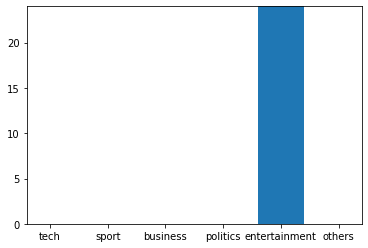

In [40]:
plt.bar(range(len(categories_occurences)), list(categories_occurences.values()), tick_label=list(categories_occurences.keys()))
plt.margins(0)
plt.show()

In [ ]:
for link in website_list:
    for lists in omittedcategories:
        for omit in range(1, len(lists)):
            if lists[omit] in categories:
                categories.remove(lists[omit])
            if os.path.exists(result_path + "/khaleejtimes/texts/"+lists[omit]+".txt"):
                inputFile = open(result_path + "/khaleejtimes/texts/"+lists[omit]+".txt", "r", encoding='utf-8')
                outputFile = open(result_path + "/khaleejtimes/texts/"+lists[0]+".txt", "a", encoding='utf-8')
                text = inputFile.read()
                outputFile.write(text)
                inputFile.close()
                os.remove(result_path + "/khaleejtimes/texts/"+lists[omit]+".txt")


In [ ]:
for link in website_list:
    website_name = link.split('/')[2]
    website_name = website_name.replace("www.","")
    website_name = website_name.replace(".com","")
    path = result_path + '/'+website_name



    for category in categories:
        inputFile = open(result_path + "/khaleejtimes/texts/"+category+".txt", "r", encoding='utf-8')
        TextExtracted = inputFile.read()
        occurences = []
        for word in words:
            occurences.append(TextExtracted.lower().count(word))
        categories_occurences.append(occurences)
        inputFile.close()
    total = [0,0,0,0,0,0]
    for occurence in categories_occurences:
        for i in range(len(occurence)):
            total[i] = total[i] + occurence[i]
    statistics = open(path + "/Statistics.txt", "w", encoding='utf-8')
    CSVstatistics = open(path + "/Statistics.csv", "w", encoding='utf-8')
    csvwriter = csv.writer(CSVstatistics)
    statistics.write("Total occurences:\n")
    for index in range(len(words)):
        statistics.write(words[index]+" = "+ str(total[index])+" occurences.\n")
    statistics.write("Statistics per category:\n")
    statistics.write('{:35s}'.format("Category:"))
    for word in words:
        statistics.write('|' + '{:5s}'.format(word))
    statistics.write("\n")
    for index in range(len(categories)):
        statistics.write('{:35s}'.format(categories[index]))
        for q in range(len(categories_occurences[0])):
            statistics.write('|' + '{:5s}'.format(str(categories_occurences[index][q])))
        statistics.write("\n")
    csvStat = copy.deepcopy(categories_occurences)
    for index in range(len(categories)):
        csvStat[index].append(categories[index])
        csvStat[index] = csvStat[index][-1:] + csvStat[index][:-1]
    csvwriter.writerows(csvStat)
    CSVstatistics.close()
    statistics.close()
